In [1]:
import zipfile
with zipfile.ZipFile('data_funds.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [59]:
!pip install datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
from dateutil.relativedelta import relativedelta


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
data = pd.read_csv('data_funds.csv', sep=';')

In [6]:
data.head()

,REPORTDATE,VALUE
0,30.12.2013,3457625638
1,31.12.2013,3417092149
2,01.01.2014,3417092149
3,02.01.2014,3417092149
4,03.01.2014,3417092149


In [7]:
data['REPORTDATE'] = pd.to_datetime(data['REPORTDATE'])

In [9]:
data.head()

,REPORTDATE,VALUE
0,2013-12-30,3457625638
1,2013-12-31,3417092149
2,2014-01-01,3417092149
3,2014-02-01,3417092149
4,2014-03-01,3417092149


In [10]:
data.shape

(2111, 2)

In [14]:
data.isnull().sum()

REPORTDATE    0
VALUE         0
dtype: int64

In [12]:
data.describe(include='all')

<ipython-input-12-589a52936347>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,REPORTDATE,VALUE
count,2111,2.111000e+03
unique,2111,NaN
top,2016-11-14 00:00:00,NaN
freq,1,NaN
first,2013-12-30 00:00:00,NaN
last,2019-12-09 00:00:00,NaN
mean,NaN,3.389668e+10
std,NaN,1.875474e+10
min,NaN,3.282810e+09
25%,NaN,1.824160e+10


## Для наглядности представим распределение данных в виде boxplot

<AxesSubplot:>

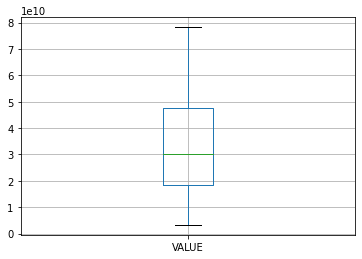

In [19]:
data.boxplot(column='VALUE')

### Исходя из сути задания, нам надо прогнозировать значения на разных интервалах времени. Для этого можно использовать библиотеку Prophet

In [20]:
!pip install prophet
from prophet import Prophet
from sklearn.metrics import mean_absolute_error # Выбираем MAE, т.к. MSE сильно штрафует за большие отклонения


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 12.1/12.1 MB 4.6 MB/s eta 0:00:00
     -------------------------------------- 47.9/47.9 kB 201.5 kB/s eta 0:00:00
     ---------------------------------------- 83.2/83.2 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 208.5/208.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 6.5 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732006 sha256=dd99ec7f2b1e8debd80ca7a9463ebbdc9c4ca762a0ca631650806546cee11ee1
  Stored in directory: c:\users\msi\appdata\local\pip\cache\wheels\b9\49\19\1ec4bcf2cc7640c6ee7815d9c02d06eaab89148fcd20e218c5
Successfully built pymeeus


In [22]:
data = data.rename(columns = {'REPORTDATE' : 'ds', 'VALUE': 'y'})  # необходимо из-за особенностей модели (при обучении данные строго называются ds и y)

In [28]:
model = Prophet()
model.fit(data)
ft = model.make_future_dataframe(periods=365)
preds = model.predict(ft)

18:10:06 - cmdstanpy - INFO - Chain [1] start processing
18:10:06 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-12-30,6.486841e+09,5.540314e+09,1.551463e+10,6.486841e+09,6.486841e+09,3.804262e+09,3.804262e+09,3.804262e+09,-2.670934e+08,-2.670934e+08,-2.670934e+08,4.071355e+09,4.071355e+09,4.071355e+09,0.0,0.0,0.0,1.029110e+10
1,2013-12-31,6.529615e+09,5.585632e+09,1.579775e+10,6.529615e+09,6.529615e+09,3.709058e+09,3.709058e+09,3.709058e+09,-2.741330e+08,-2.741330e+08,-2.741330e+08,3.983191e+09,3.983191e+09,3.983191e+09,0.0,0.0,0.0,1.023867e+10
2,2014-01-01,6.572390e+09,4.879067e+09,1.551391e+10,6.572390e+09,6.572390e+09,3.732940e+09,3.732940e+09,3.732940e+09,-1.248304e+08,-1.248304e+08,-1.248304e+08,3.857771e+09,3.857771e+09,3.857771e+09,0.0,0.0,0.0,1.030533e+10
3,2014-01-02,6.615165e+09,5.514765e+09,1.522010e+10,6.615165e+09,6.615165e+09,3.696452e+09,3.696452e+09,3.696452e+09,-1.641791e+06,-1.641791e+06,-1.641791e+06,3.698094e+09,3.698094e+09,3.698094e+09,0.0,0.0,0.0,1.031162e+10
4,2014-01-03,6.657940e+09,5.330306e+09,1.550640e+10,6.657940e+09,6.657940e+09,3.515932e+09,3.515932e+09,3.515932e+09,8.245801e+06,8.245801e+06,8.245801e+06,3.507686e+09,3.507686e+09,3.507686e+09,0.0,0.0,0.0,1.017387e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,2020-12-04,9.098390e+10,8.324226e+10,9.533231e+10,8.841032e+10,9.343063e+10,-1.838667e+09,-1.838667e+09,-1.838667e+09,8.245801e+06,8.245801e+06,8.245801e+06,-1.846913e+09,-1.846913e+09,-1.846913e+09,0.0,0.0,0.0,8.914523e+10
2472,2020-12-05,9.102943e+10,8.370919e+10,9.475262e+10,8.845028e+10,9.348229e+10,-1.521160e+09,-1.521160e+09,-1.521160e+09,2.130136e+08,2.130136e+08,2.130136e+08,-1.734174e+09,-1.734174e+09,-1.734174e+09,0.0,0.0,0.0,8.950827e+10
2473,2020-12-06,9.107496e+10,8.366334e+10,9.545791e+10,8.848455e+10,9.353394e+10,-1.138286e+09,-1.138286e+09,-1.138286e+09,4.464393e+08,4.464393e+08,4.464393e+08,-1.584725e+09,-1.584725e+09,-1.584725e+09,0.0,0.0,0.0,8.993667e+10
2474,2020-12-07,9.112049e+10,8.398217e+10,9.487909e+10,8.851883e+10,9.358560e+10,-1.666330e+09,-1.666330e+09,-1.666330e+09,-2.670934e+08,-2.670934e+08,-2.670934e+08,-1.399237e+09,-1.399237e+09,-1.399237e+09,0.0,0.0,0.0,8.945416e+10


In [26]:
print(dir(predictions))

['T', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_TO_AXIS_NUMBER', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul__', '__ror

In [42]:
fc = preds.trend.values
fc

array([6.48684055e+09, 6.52961537e+09, 6.57239019e+09, ...,
       9.10749601e+10, 9.11204896e+10, 9.11660192e+10])

In [44]:
print(mean_absolute_error(data.y, fc[:2111]))

2955339467.134222


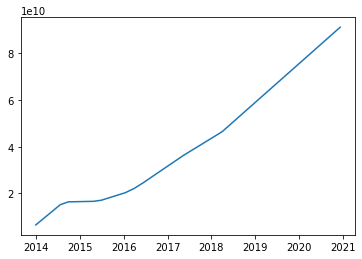

In [46]:
plt.plot(preds.ds, preds.trend)
plt.show()

In [56]:
def predictor(date_pre, period, hist):
    date_pre=date_pre
    period=period
    hist=hist
    model = Prophet()
    model.fit(data.loc[(data['ds'] > datetime.datetime.strptime('2013-12-30', '%Y-%m-%d')) & (data['ds'] < datetime.datetime.strptime(hist, '%Y-%m-%d'))])
    ft = model.make_future_dataframe(periods=(datetime.datetime.strptime(date_pre, '%Y-%m-%d')+relativedelta(months=period)-datetime.datetime.strptime(date_pre, '%Y-%m-%d')).days)
    preds = model.predict(ft)
    return  pd.DataFrame(preds[['ds','trend']])

In [73]:
stable_part = predictor('2019-01-01', 11, '2018-01-01')

18:46:00 - cmdstanpy - INFO - Chain [1] start processing
18:46:00 - cmdstanpy - INFO - Chain [1] done processing


In [74]:
stable_part

,ds,trend
0,2013-12-31,7.294936e+09
1,2014-01-01,7.332901e+09
2,2014-01-02,7.370865e+09
3,2014-01-03,7.408830e+09
4,2014-01-04,7.446794e+09
...,...,...
1791,2018-11-26,5.319321e+10
1792,2018-11-27,5.322306e+10
1793,2018-11-28,5.325291e+10
1794,2018-11-29,5.328277e+10


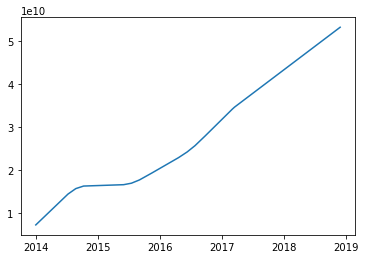

In [75]:
plt.plot(stable_part.ds, stable_part.trend)
plt.show()